In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [19]:
df=pd.read_excel("ClaimDetailsnew.xlsx")
df

,ClaimNumber,LossDate,PolicyNumber,PolicyEntryDate,PolicyExpirationDate,ClaimLossDesc,ClaimStatus,Examiner,ClaimLOB,InsuredName,...,YearBuilt,Stories,Comments,ConstructionTypeDesc,FormattedAddress,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2003862,2019-04-18 00:00:00.000,5010232,2019-05-03 08:09:04.880,2019-07-01 00:00:00.000,back up causing sewage water in from the drain...,Closed,rgibson,BOP Property,"ETHERIDGE OWNERS, INC.",...,1965,8,ClassCode:65146,MasonryNonCombustible,"3114 WISCONSIN AVENUE, NW\n\rWASHINGTON, DC 20016",20016,7626.78,4758237.0,30800,5090954
1,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
2,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
3,2005666,2020-04-30 00:00:00.000,7120072,2020-05-15 12:29:16.837,2020-10-10 00:00:00.000,Façade sign was torn from the building and han...,Closed,ahart,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,3009.98,3640000.0,35000,5426100
4,2006935,2021-01-27 00:00:00.000,7120072,2021-02-12 13:24:24.330,2021-10-10 00:00:00.000,Fire damage to the building,Closed,rgibson,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
203,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
204,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000
205,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000


In [20]:
df['ZipCode'].value_counts()

ZipCode
18102    12
45247    12
18015    10
18042     5
20002     4
         ..
44035     1
15108     1
44135     1
15217     1
17046     1
Name: count, Length: 113, dtype: int64

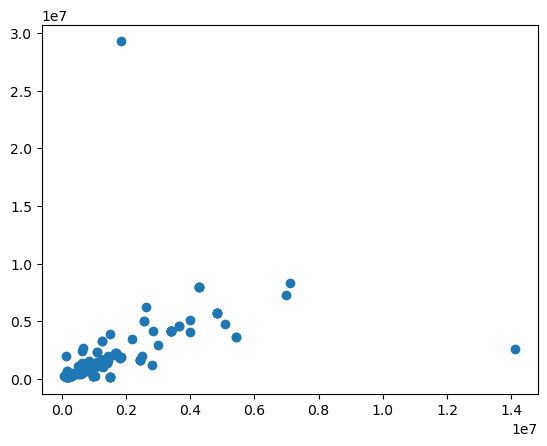

In [21]:
plt.scatter(df['BuildingLimit'], df['E2Value'])


In [22]:
corr = df['E2Value'].corr(df['BuildingLimit'])
print(corr)

0.5349132724368354


In [23]:
df['E2value_new'] = df['BuildingLimit']*corr
df

,ClaimNumber,LossDate,PolicyNumber,PolicyEntryDate,PolicyExpirationDate,ClaimLossDesc,ClaimStatus,Examiner,ClaimLOB,InsuredName,...,Stories,Comments,ConstructionTypeDesc,FormattedAddress,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,E2value_new
0,2003862,2019-04-18 00:00:00.000,5010232,2019-05-03 08:09:04.880,2019-07-01 00:00:00.000,back up causing sewage water in from the drain...,Closed,rgibson,BOP Property,"ETHERIDGE OWNERS, INC.",...,8,ClassCode:65146,MasonryNonCombustible,"3114 WISCONSIN AVENUE, NW\n\rWASHINGTON, DC 20016",20016,7626.78,4758237.0,30800,5090954,2.723219e+06
1,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320,1.369549e+06
2,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320,1.369549e+06
3,2005666,2020-04-30 00:00:00.000,7120072,2020-05-15 12:29:16.837,2020-10-10 00:00:00.000,Façade sign was torn from the building and han...,Closed,ahart,BOP Property,"RLGVS, LLC",...,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,3009.98,3640000.0,35000,5426100,2.902493e+06
4,2006935,2021-01-27 00:00:00.000,7120072,2021-02-12 13:24:24.330,2021-10-10 00:00:00.000,Fire damage to the building,Closed,rgibson,BOP Property,"RLGVS, LLC",...,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,48695.03,3640000.0,35000,5426100,2.902493e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000,1.960992e+06
203,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000,1.960992e+06
204,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000,9.050733e+05
205,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000,9.050733e+05


In [24]:
from datetime import datetime
df['YearGap'] = datetime.now().year - df['YearBuilt']
df['ZipCode'] = df['ZipCode'].astype('string')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ClaimNumber             207 non-null    int64  
 1   LossDate                207 non-null    object 
 2   PolicyNumber            207 non-null    int64  
 3   PolicyEntryDate         207 non-null    object 
 4   PolicyExpirationDate    207 non-null    object 
 5   ClaimLossDesc           207 non-null    object 
 6   ClaimStatus             207 non-null    object 
 7   Examiner                207 non-null    object 
 8   ClaimLOB                207 non-null    object 
 9   InsuredName             207 non-null    object 
 10  InsuredAddress          207 non-null    object 
 11  Jurisdiction            207 non-null    object 
 12  InsuredIsClaimant       207 non-null    int64  
 13  SuffixCode              207 non-null    int64  
 14  ClaimantBusinessName    207 non-null    ob

In [25]:
from sklearn import preprocessing
label_encoders = {}
label_encoders['ZipCode'] = preprocessing.LabelEncoder()
df['ZipCode'] = label_encoders['ZipCode'].fit_transform(df['ZipCode'])
df

,ClaimNumber,LossDate,PolicyNumber,PolicyEntryDate,PolicyExpirationDate,ClaimLossDesc,ClaimStatus,Examiner,ClaimLOB,InsuredName,...,Comments,ConstructionTypeDesc,FormattedAddress,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,E2value_new,YearGap
0,2003862,2019-04-18 00:00:00.000,5010232,2019-05-03 08:09:04.880,2019-07-01 00:00:00.000,back up causing sewage water in from the drain...,Closed,rgibson,BOP Property,"ETHERIDGE OWNERS, INC.",...,ClassCode:65146,MasonryNonCombustible,"3114 WISCONSIN AVENUE, NW\n\rWASHINGTON, DC 20016",77,7626.78,4758237.0,30800,5090954,2.723219e+06,58
1,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",86,17492.12,5042916.0,30480,2560320,1.369549e+06,54
2,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",86,17492.12,5042916.0,30480,2560320,1.369549e+06,54
3,2005666,2020-04-30 00:00:00.000,7120072,2020-05-15 12:29:16.837,2020-10-10 00:00:00.000,Façade sign was torn from the building and han...,Closed,ahart,BOP Property,"RLGVS, LLC",...,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",43,3009.98,3640000.0,35000,5426100,2.902493e+06,11
4,2006935,2021-01-27 00:00:00.000,7120072,2021-02-12 13:24:24.330,2021-10-10 00:00:00.000,Fire damage to the building,Closed,rgibson,BOP Property,"RLGVS, LLC",...,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",43,48695.03,3640000.0,35000,5426100,2.902493e+06,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",108,NaN,4617938.0,24440,3666000,1.960992e+06,73
203,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",108,NaN,4617938.0,24440,3666000,1.960992e+06,73
204,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",108,NaN,2231296.8,11280,1692000,9.050733e+05,73
205,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",108,NaN,2231296.8,11280,1692000,9.050733e+05,73


In [26]:
df['ZipCode'].value_counts()

ZipCode
57     12
108    12
53     10
56      5
74      4
       ..
93      1
1       1
99      1
10      1
35      1
Name: count, Length: 113, dtype: int64

In [27]:
X= df[['BuildingLimit', 'YearGap', 'ZipCode']]
y = df['E2Value']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [33]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import pickle
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from lightgbm import Dataset

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2= r2_score(y_test, y_pred)
R2

0.7480516569224618

In [38]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred1 = xgr.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
R2_1= r2_score(y_test, y_pred1)
R2_1

0.7596752180324754

In [41]:
df_new=pd.read_excel("ClaimDetailsnew.xlsx")
from datetime import datetime
df_new['YearGap'] = datetime.now().year - df_new['YearBuilt']
df_new['ZipCode'] = df_new['ZipCode'].astype('string')
df_new = df_new[['BuildingLimit', 'YearGap', 'ZipCode', 'E2Value']]
df_new

,BuildingLimit,YearGap,ZipCode,E2Value
0,5090954,58,20016,4758237.0
1,2560320,54,23228,5042916.0
2,2560320,54,23228,5042916.0
3,5426100,11,17319,3640000.0
4,5426100,11,17319,3640000.0
...,...,...,...,...
202,3666000,73,45247,4617938.0
203,3666000,73,45247,4617938.0
204,1692000,73,45247,2231296.8
205,1692000,73,45247,2231296.8


In [42]:
df_new['ZipCode'] = label_encoders['ZipCode'].transform(df_new['ZipCode'])

In [45]:
predicted_e2value= model.predict(df_new[['BuildingLimit', 'YearGap', 'ZipCode']])
df_new['new_e2val'] = predicted_e2value
df_new.head(100)

,BuildingLimit,YearGap,ZipCode,E2Value,new_e2val
0,5090954,58,77,4758237.00,4.567350e+06
1,2560320,54,86,5042916.00,2.496304e+06
2,2560320,54,86,5042916.00,2.496304e+06
3,5426100,11,43,3640000.00,4.950517e+06
4,5426100,11,43,3640000.00,4.950517e+06
...,...,...,...,...,...
95,618675,53,13,2435154.00,1.277201e+06
96,618675,53,13,1369359.00,1.277201e+06
97,640120,83,59,640120.00,1.109136e+06
98,309000,103,88,333720.00,7.282278e+05
